# **Preprocessing**

**Crawling 을 통해 얻은 corpus에서 필요에 맞게 전처리가 필요**

용도에 맞게 텍스트를 사전에 처리하는작업.

원하는 형태로 변형해서 분석

NLTK -영어text의 처리를 위한 library

Gensim : 주로 topic modeling, corpus및 word embeding model지원

한국어 및 다양한 언어 지원

**1. Tokenization**

주어진 corpus에서 token이라 불리는 단위로 나누는 작업.(의미있는 단위의 토큰을 정의)

고려할 사항(영어의 경우) : 구두점이나 특수문자를 단순제외하면 안됨. 

줄임말과 단어 내에 띄어쓰기가 있는 경우(She's/ Don't /Data-mining)

##실습

sentence-tokenization

In [0]:
!pip install nltk

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from nltk.tokenize import sent_tokenize

text_sent = "Hello world. It's good to see you. Thanks for buying this book."
print(sent_tokenize(text_sent))
#뉴스기사-문장단위

['Hello world.', "It's good to see you.", 'Thanks for buying this book.']


In [29]:
text_sent = "IP is 192.168.152.1. Since I'm actively looking for Ph.D. students"
print(sent_tokenize(text_sent))
#예외처리가 된경우.(IP, URL, 약어)

['IP is 192.168.152.1.', "Since I'm actively looking for Ph.D. students"]


word-tokenization

In [30]:
from nltk.tokenize import word_tokenize

text_word = "Hello world. It's good to see you. Thanks for buying this book. I can't go."
print(word_tokenize(text_word))
#It's => It + 's / can't => ca + n't

['Hello', 'world', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Thanks', 'for', 'buying', 'this', 'book', '.', 'I', 'ca', "n't", 'go', '.']


In [31]:
#구두점단위로  tokenize
from nltk.tokenize import WordPunctTokenizer

#사용을 위해 instance화
tokenizer = WordPunctTokenizer()

text_punkt = "Hello world. It's good to see you. Thanks for buying this book. I can't go."
print(tokenizer.tokenize(text_punkt))

['Hello', 'world', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Thanks', 'for', 'buying', 'this', 'book', '.', 'I', 'can', "'", 't', 'go', '.']


# Normalization(정규화)

규칙기반을 통해 단어들을 통합시켜서 같은 단어로 만들기.

HTML 문서로부터 가져온 corpus라면 문서 내에 있는 HTML 태그 제거.

뉴스기사의 경우 게재시간 제거, 기자이름 제거

**Cleaning(정제)-갖고있는 corpus로부터 noise 제거**

대,소문자 통합. (예외 us-우리 VS US-미국)

등장빈도 적은단어 제거. 

길이가 짧은 단어 제거.  (영어 : a, it, at,  on, in, by등.. 한국어는 어렵다.) 



**Lemmatization(표제어 추출), Stemming(어간 추출)**

Lemmatization: 품사정보가 보존된 형태의 기본형으로 변환.  표제어 추출에 가장 섬세한방법은 형태학적 파싱.

형태소란? 의미를 가진 가장 작은 단위. 

Semming : 대표적 포터 알고리즘의 어간 추출.

## 실습

In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
lemma = WordNetLemmatizer()

word = ["doing", "policy", "have", "going", "dies", "has", "watched"]

[lemma.lemmatize(_) for _ in word]

['doing', 'policy', 'have', 'going', 'dy', 'ha', 'watched']

In [34]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize("has","v"),end=' ')
print(lemma.lemmatize("doing","v"),end=' ')
print(lemma.lemmatize("watched","v"),end=' ')
print(lemma.lemmatize("am","v"),end=' ')

have do watch be 

In [35]:
text_word = "Hello world. It's good to see you. Thanks for buying this book."
text_word.upper()

"HELLO WORLD. IT'S GOOD TO SEE YOU. THANKS FOR BUYING THIS BOOK."

**정규표현**

In [36]:
import re
r = re.compile('ab.')
r.search('ssssabcle')

<_sre.SRE_Match object; span=(4, 7), match='abc'>

In [37]:
text = "사과 복숭아 메론 바나나"
re.split(' ',text)

['사과', '복숭아', '메론', '바나나']

In [38]:
text = """이름 : 정희석
전화번호 : 010-2889-3161
성별 : 남자"""

re.findall('\w+',text)

['이름', '정희석', '전화번호', '010', '2889', '3161', '성별', '남자']

In [39]:
text = """Regular Expression : A regular or regexp[1] . """
#substitute
re.sub("[^A-Za-z]+"," ",text) #영어가아닌거 전부 없애기.

'Regular Expression A regular or regexp '

In [40]:
text = """100 John PROF 101 James STUD 102 Mac STUD"""

re.findall('[A-Z][a-z]+',text) #이름만 뽑아내기/

['John', 'James', 'Mac']

In [41]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\s]+", gaps=True)   #공백으로 끊기.
print(tokenizer.tokenize("Hello world. It's good to see you. Thanks for buying this book."))

['Hello', 'world.', "It's", 'good', 'to', 'see', 'you.', 'Thanks', 'for', 'buying', 'this', 'book.']


https://regex101.com/

**Lemmatization**

am -> be

having -> have

**Stemming**

In [42]:
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

word = ['formalize', 'allowance', 'electricical']

[ stemming.stem(_) for _ in word]

['formal', 'allow', 'electric']

**Stopword(불용어)**

my,me,over,조사,접미사 등.. 의미분석에는 기여도가 없는


[한국어] 조사,접미사: 나,너,은,는,이,가,하다,합니다 등


In [43]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [44]:
#불용어 제거해보기
example = """Family is not an important thing. It's everything"""
token = word_tokenize(example)
clean_word = [_ for _ in token if _ not in set(stopwords.words('english'))]

#중복될수있으니
#set(stopwords.words('english'))으로.
clean_word

['Family', 'important', 'thing', '.', 'It', "'s", 'everything']

# Text Vector

**Bag of words** : 단어들의 출현 빈도에 집중. Index 부여

**TF-IDF**  

TF (term freq.) 

IDF(Inverse Document Freq)-문서내 자주등장할수록 중요할수 있지만 그냥 흔한 단어일수도

## Word Cloud

In [45]:
!pip install matplotlib
!pip install WordCloud

In [0]:
lyr ="""From the day we arrive on the planet
And blinking, step into the sun
There's more to see than can ever be seen
More to do than can ever be done
There's far too much to take in here
More to find than can ever be found
But the sun rolling high
Through the sapphire sky
Keeps great and small on the endless round
It's the circle of life
And it moves us all
Through despair and hope
Through faith and love
Till we find our place
On the path unwinding
In the circle
The circle of life
It's the circle of life
And it moves us all
Through despair and hope
Through faith and love
Till we find our place
On the path unwinding
In the circle
The circle of life
"""

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate(lyr)
wordcloud.words_

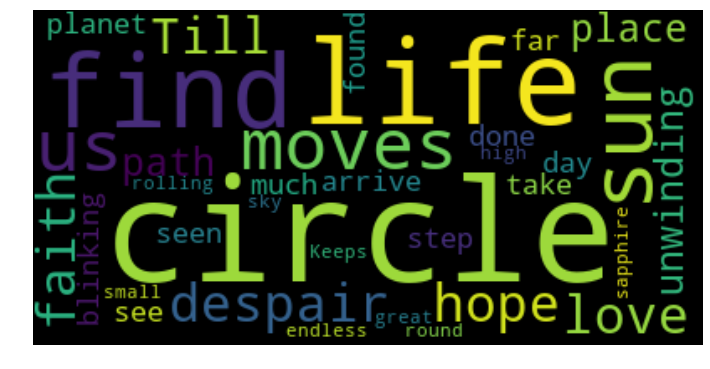

In [48]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

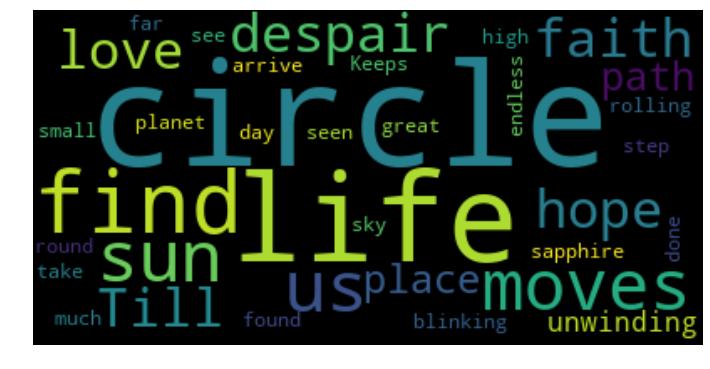

In [49]:
#stopword 빼보기.
token = word_tokenize(lyr)
clean_word = [_ for _ in token if _ not in set(stopwords.words('english'))]


from functools import reduce
clean_lyr = reduce((lambda x,y :x+' '+y),clean_word)

wordcloud = WordCloud().generate(clean_lyr)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**사실 wordcloud.words_에 stopwords 없음**

# 형태소 분석 실습

다양한 언어표현의 중의성을 해소하기위해

한계점 : 신조어,은어, 오탈자 ,띄어쓰기 오류들이 큰 영향을 미침(존맛탱..)

다의어에 대해서 모호성을 해결하지 못함.(밤이 어둡다. 밤이 맛있다)

**KoNLPy**

한국어 자연어처리를 위한 대표적인 파이썬 라이브러리

Twitter, Komoran, Hannanum, Mecab, Kkma 등..

성능비교 - 띄어쓰기, 의미파악, 신조어, 로딩시간, 처리시간

(느리지만 성능은 Kkma가 좋은편)

In [50]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (109 kB/s)
Reading package lists... Done


In [51]:
!apt-get install g++ openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jre x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jre x11-utils
0 upgraded, 13 newly installed, 0 to remove and 34 not upgraded.
Need to get 6,847 kB of 

In [52]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 2.8MB/s 
     |████████████████████████████████| 2.7MB 33.3MB/s 


**Kkma**

In [53]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences(u"네 안녕하세요. 반갑습니다."))

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['네 안녕하세요.', '반갑습니다.']


In [54]:
pprint(kkma.pos(u"하늘을 나는 자동차"))

[('하늘', 'NNG'), ('을', 'JKO'), ('날', 'VV'), ('는', 'ETD'), ('자동차', 'NNG')]


품사사전

http://kkma.snu.ac.kr/documents/?doc=postag

**Hannanum**

In [55]:
from konlpy.tag import Hannanum

han =Hannanum()

#print(han.analyze(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))  #후보군을 보여준다.
#print(han.nouns(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))  #명사
#print(han.pos(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))  #품사태깅
print(han.morphs(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))  #형태소단위로 쪼개기


['아버지', '가', '방', '에', '들', '어', '가', '시ㄴ다', '.', '안녕', '하', '세', '요', '.', '하늘', '을', '나', '는', '자동차']


**Komoran**

In [56]:
from konlpy.tag import Komoran

#pos, morphs, nouns 가능..
ko = Komoran()
#pprint(ko.pos(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))
pprint(ko.morphs(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))

['아버지',
 '가',
 '방',
 '에',
 '들어가',
 '시',
 'ㄴ다',
 '.',
 '안녕하세요',
 '.',
 '하늘',
 '을',
 '나',
 '는',
 '자동차']


**Twitter**

In [57]:
from konlpy.tag import Twitter

tw = Twitter()

pprint(tw.pos(u"아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차"))

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation'),
 ('안녕하세요', 'Adjective'),
 ('.', 'Punctuation'),
 ('하늘', 'Noun'),
 ('을', 'Josa'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('자동차', 'Noun')]


# 한국어 리뷰 분석

네이버 영화 리뷰- 영화당 100개, 총 20만개 (train 15만, test 5만)

중립적인  5~8평점: 제외,


1~4 : 부정 (0)

9~10 : 긍정(1)

In [58]:
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


runtime유형 확인할것

In [60]:
# 10개만 가져와서 잘받았나 확인해봄
!cat ./nsmc/ratings_train.txt | head -n 10

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1


In [61]:
#data 읽어오는 함수 만들기
def read_data(filename):
  with open(filename,'r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
  return data
  
train_data = read_data('./nsmc/ratings_train.txt')
test_data = read_data('./nsmc/ratings_test.txt')
print(train_data[0:3])

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'], ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'], ['10265843', '너무재밓었다그래서보는것을추천한다', '0']]


In [62]:
#잘나눠졌나 확인.
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


형태소 분석기를 사용할것이다.

In [64]:
import konlpy
konlpy.__version__

'0.5.1'

In [65]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 '))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun')]


In [0]:
import json
import os
from pprint import pprint

#너무많아서 요만큼만 갖고할려고 줄임
train_data = train_data[:10000]
test_data = test_data[:1000]

In [67]:
def tokenize(doc):
  #norm은 정규화, stem은 근어로 표시하기
  return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile("./nsmc/train_doc.json"):
  with open("./nsmc/train_doc.json") as f:
    train_docs = json.load(f)
  with open("./nsmc/test_doc.json") as f:
    test_docs = json.load(f)
else:
  #train_data을 tokenize해서
  train_docs = [(tokenize(row[1]),row[2]) for row in train_data]
  test_docs = [(tokenize(row[1]),row[2]) for row in test_data]
  #json 파일로 저장
  with open("./nsmc/train_doc.json", 'w', encoding='utf-8') as make_file:
    json.dump(train_docs, make_file, ensure_ascii=False, indent='\t')
    
  with open("./nsmc/test_doc.json", 'w', encoding='utf-8') as make_file:
    json.dump(test_docs, make_file, ensure_ascii=False, indent='\t')
    
pprint(train_docs[0])

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')


Bag of words만들기

In [68]:
tokens = [t for d in train_docs for t in d[0]]
print(tokens)

['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun', '흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb', '너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb', '교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun', '사이/Modifier', '몬페/Noun', '그/Determiner', '의/Noun', '익살스럽다/Adjective', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '커스틴/Noun', '던스트/Noun', '가/Josa', '너무나도/Adverb', '이쁘다/Adjective', '보이다/Verb', '막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살다/Verb', '영화/Noun', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '.../Punctuation', '별/Modifier',

In [69]:
import nltk
text = nltk.Text(tokens, name='NSMC')   #most commons 사용하려고
print(text)

<Text: NSMC>


In [70]:
#전체 토큰 갯수
print(len(text.tokens))

#중복을 제외한 토큰의 개수
print(len(set(text.tokens)))

#출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

146795
13496
[('./Punctuation', 4791),
 ('영화/Noun', 3368),
 ('하다/Verb', 2829),
 ('이/Josa', 2624),
 ('보다/Verb', 2576),
 ('의/Josa', 2123),
 ('../Punctuation', 1949),
 ('가/Josa', 1789),
 ('에/Josa', 1771),
 ('을/Josa', 1587)]


In [0]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]  #사전 만들기.(전체 토큰화된 텍스트중 상위 1만개.)

def term_frequency(doc):
  return [doc.count(word) for word in selected_words]

#벡터만들기.
train_x =[term_frequency(d) for d, _ in train_docs]
test_x =[term_frequency(d) for d, _ in test_docs]
train_y = [c for _,c in train_docs]
test_y = [c for _,c in test_docs]

In [0]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [76]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

#loss function으로 binary_crossentropy 사용
#RMSProp optimizer를 통해 gradient descent 진행
#batch size 512, epoch =10

model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

model.fit(x_train,y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test,y_test)

results

Epoch 1/10
10000/10000 [==============================] - 1s 109us/sample - loss: 0.4929 - binary_accuracy: 0.7657
Epoch 2/10
10000/10000 [==============================] - 0s 36us/sample - loss: 0.2574 - binary_accuracy: 0.9005
Epoch 3/10
10000/10000 [==============================] - 0s 37us/sample - loss: 0.1604 - binary_accuracy: 0.9410
Epoch 4/10
10000/10000 [==============================] - 0s 39us/sample - loss: 0.1057 - binary_accuracy: 0.9643
Epoch 5/10
10000/10000 [==============================] - 0s 36us/sample - loss: 0.0728 - binary_accuracy: 0.9778
Epoch 6/10
10000/10000 [==============================] - 0s 37us/sample - loss: 0.0487 - binary_accuracy: 0.9843
Epoch 7/10
10000/10000 [==============================] - 0s 38us/sample - loss: 0.0342 - binary_accuracy: 0.9897
Epoch 8/10
10000/10000 [==============================] - 0s 37us/sample - loss: 0.0245 - binary_accuracy: 0.9924
Epoch 9/10
10000/10000 [==============================] - 0s 38us/sample - loss: 0.0187

[1.4108911620378495, 0.792]

In [0]:
def predict_pos_neg(review):
  token = tokenize(review)
  tf = term_frequency(token)
  #데이터 형태 맞추기 위해 np.expand_dims 이용해서 array축 확장
  data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
  score = float(model.predict(data))
  
  if (score > 0.5):
    print("[{}]는 {:2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.\n".format(review,score*100))
  else:
    print("[{}]는 {:2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.\n".format(review,(1-score)*100))
    

In [80]:
predict_pos_neg("올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.")
predict_pos_neg("배경 음악이 영화의 분위기랑 너무 안맞았습니다. 몰입에 방해가 됩니다.")
predict_pos_neg("주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ")
predict_pos_neg("주연 배우때문에 봤어요")

[올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.]는 100.000000% 확률로 긍정 리뷰이지 않을까 추측해봅니다.

[배경 음악이 영화의 분위기랑 너무 안맞았습니다. 몰입에 방해가 됩니다.]는 98.127936% 확률로 부정 리뷰이지 않을까 추측해봅니다.

[주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ]는 99.991643% 확률로 긍정 리뷰이지 않을까 추측해봅니다.

[주연 배우때문에 봤어요]는 93.794481% 확률로 부정 리뷰이지 않을까 추측해봅니다.

